# Homework 2

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
dir(pd)

['ArrowDtype',
 'BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int64Index',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt64Index',
 'UInt8Dtype',
 '__all__',
 '__builtins__',
 '__cached__',
 '__deprecated_num_index_names',
 '__dir__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_is_numpy_dev',
 '_libs',
 '_testing',
 '

## Data Sets

In [3]:
df = pd.read_csv('ClimateData.csv')
Labels = pd.read_csv('Metadata.csv', header = None)

Labels

,0,1
0,id,building id
1,building_class,building classification
2,floor_area,floor area (in square feet) of the building
3,year_built,year in which the building was constructed
4,precipitation_inches,annual precipitation in inches at the location...
5,snowfall_inches,annual snowfall in inches at the location of t...
6,avg_temp,average temperature over a year at the locatio...
7,days_with_fog,number of days with fog at the location of the...
8,eui,Site Energy Usage Intensity is the amount of h...


In [4]:
df

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,NaN,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,NaN,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,NaN,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,NaN,592.02


## 1. Look at data set types and write a summary of variables 

### Overall I believe the dataset to be a multivariate dataset because it uses a combo of numerical and catagorical information

ID = Numerical<br>
Building Class = Categorical<br>
Floor Area = Numerical<br>
Year Built = Numerical<br>
Precipitation Inches = Numerical<br>
Snowfall Inches = Numerical<br>
Average Temp = Numerical<br>
Days with Fog = Numerical<br>
Site EUI = Numerical

## 2. Summarize the number of unique values in each column 

### Number of unique values in 'ID'

In [5]:
print('number of unique values')
print(len(df['id'].value_counts()))

df['id'].value_counts()

number of unique values
75757


0        1
50493    1
50509    1
50508    1
50507    1
        ..
25252    1
25251    1
25250    1
25249    1
75756    1
Name: id, Length: 75757, dtype: int64

### Number of unique values in 'building_class'

In [6]:
print('number of unique values')
print(len(df['building_class'].value_counts()))

df['building_class'].value_counts()

number of unique values
2


Residential    43558
Commercial     32199
Name: building_class, dtype: int64

In [27]:
df['year_built'] = df['year_built'].apply(lambda x: 2023 - x)
age = df.iloc[:,3]

In [28]:
print('number of unique values')
print(len(age.value_counts()))

age.value_counts()


number of unique values
180


1927.0    2064
1929.0    1999
1928.0    1979
1930.0    1811
1925.0    1710
          ... 
1878.0       1
1829.0       1
1844.0       1
1871.0       1
1815.0       1
Name: year_built, Length: 180, dtype: int64

### Number of unique values in 'floor_area'

In [61]:
print('number of unique values')
print(len(df['floor_area'].value_counts()))

df['floor_area'].value_counts()

number of unique values
20433


60000.0     264
70000.0     213
80000.0     176
75000.0     173
72000.0     173
           ... 
450500.0      1
354100.0      1
123290.0      1
133280.0      1
40489.0       1
Name: floor_area, Length: 20433, dtype: int64

### Number of unique values in 'precipitation_inches'

In [62]:
print('number of unique values')
print(len(df['precipitation_inches'].value_counts()))

df['precipitation_inches'].value_counts()

number of unique values
171


42.17    13015
40.97    10144
53.79     9267
38.51     8362
46.32     8296
         ...  
3.02         1
77.19        1
63.43        1
29.97        1
41.11        1
Name: precipitation_inches, Length: 171, dtype: int64

### Number of unique values in 'snowfall_inches'

In [63]:
print('number of unique values')
print(len(df['snowfall_inches'].value_counts()))

df['snowfall_inches'].value_counts()

number of unique values
71


36.0    13015
49.1    10144
50.0     9267
0.0      8726
9.6      8363
        ...  
50.5        1
51.4        1
54.6        1
63.5        1
0.5         1
Name: snowfall_inches, Length: 71, dtype: int64

### Number of unique values in 'avg_temps'

In [64]:
print('number of unique values')
print(len(df['avg_temp'].value_counts()))

df['avg_temp'].value_counts()

number of unique values
173


57.215847    13015
56.835616    10144
54.501370     9267
57.366120     8362
55.449315     8296
             ...  
53.750000        1
52.959016        1
61.494536        1
51.658470        1
46.611570        1
Name: avg_temp, Length: 173, dtype: int64

### Number of unique values in 'days_with_fog'

In [65]:
print('number of unique values')
print(len(df['days_with_fog'].value_counts()))

df['days_with_fog'].value_counts()

number of unique values
42


131.0    5386
99.0     4287
148.0    2614
56.0     2216
106.0    1967
79.0     1854
12.0     1761
110.0    1529
93.0     1442
104.0    1097
267.0     765
111.0     691
116.0     635
261.0     620
88.0      576
63.0      488
65.0      482
73.0      327
176.0     316
101.0     237
311.0     143
87.0       98
161.0      95
114.0      65
31.0       60
125.0      48
58.0       35
289.0      27
113.0      26
120.0      22
90.0       12
82.0        8
37.0        7
178.0       5
86.0        4
84.0        3
126.0       3
51.0        3
156.0       2
184.0       2
89.0        2
107.0       1
Name: days_with_fog, dtype: int64

### Number of unique values in 'site_eui'

In [66]:
print('number of unique values')
print(len(df['site_eui'].value_counts()))

df['site_eui'].value_counts()

number of unique values
17203


79.78     48
76.89     46
72.20     46
69.21     45
67.71     45
          ..
376.17     1
210.94     1
120.61     1
462.69     1
592.02     1
Name: site_eui, Length: 17203, dtype: int64

## 3. Check the descriptive statistics for the dataset 

In [44]:
#Separate 

ID = df.iloc[:,0]
cla = df.iloc[:,1]
area = df.iloc[:,2]
rain = df.iloc[:,3]
snow = df.iloc[:,4]
temp = df.iloc[:,5]
fog = df.iloc[:,0]
eui = df.iloc[:,0]

I felt it unnecessary to do the. descriptive statistics for the ID and building class since ID is basically the row number and the class is a categorical variable

### Area

In [47]:
print("min:", area.min()) #min
print("max:", area.max())#max
print("mean:", np.mean(area))#mean
print("median:", np.median(area))#median
print("standard deviation:", np.std(area))#standard deviation

Area
min: 943.0
max: 6385382.0
mean: 165983.86585794055
median: 91367.0
standard deviation: 246874.16154190333


### Rain

In [48]:
print("min:", rain.min()) #min
print("max:", rain.max())#max
print("mean:", np.mean(rain))#mean
print("median:", np.median(rain))#median
print("standard deviation:", np.std(rain))#standard deviation

min: 0.0
max: 2015.0
mean: 1952.306764069264
median: nan
standard deviation: 37.05336837491324


### Snow

In [49]:
print("min:", snow.min()) #min
print("max:", snow.max())#max
print("mean:", np.mean(snow))#mean
print("median:", np.median(snow))#median
print("standard deviation:", np.std(snow))#standard deviation

min: 0.0
max: 107.69
mean: 42.43065116094883
median: 42.17
standard deviation: 10.592134775338623


### Avg Temp

In [50]:
print("min:", temp.min()) #min
print("max:", temp.max())#max
print("mean:", np.mean(temp))#mean
print("median:", np.median(temp))#median
print("standard deviation:", np.std(temp))#standard deviation

min: 0.0
max: 127.3
mean: 29.136379476484024
median: 31.6
standard deviation: 17.81077636186262


### Fog

In [51]:
print("min:", fog.min()) #min
print("max:", fog.max())#max
print("mean:", np.mean(fog))#mean
print("median:", np.median(fog))#median
print("standard deviation:", np.std(fog))#standard deviation

min: 0
max: 75756
mean: 37878.0
median: 37878.0
standard deviation: 21869.16216959397


### EUI

In [52]:
print("min:", eui.min()) #min
print("max:", eui.max())#max
print("mean:", np.mean(eui))#mean
print("median:", np.median(eui))#median
print("standard deviation:", np.std(eui))#standard deviation

min: 0
max: 75756
mean: 37878.0
median: 37878.0
standard deviation: 21869.16216959397


## 4. Check the number of missing values

In [69]:
print('id')
df['id'].isna().sum()

id


0

In [70]:
print('building_class')
df['building_class'].isna().sum()

building_class


0

In [76]:
print('floor area')
df['floor_area'].isna().sum()

floor area


0

In [77]:
print('year built')
df['year_built'].isna().sum()

year built


1837

In [71]:
print('rain')
df['precipitation_inches'].isna().sum()

rain


0

In [72]:
print('snow')
df['snowfall_inches'].isna().sum()

snow


0

In [73]:
print('avg temp')
df['avg_temp'].isna().sum()

avg temp


0

In [74]:
print('fog')
df['days_with_fog'].isna().sum()

fog


45796

In [75]:
print('eui')
df['site_eui'].isna().sum()

eui


0

## 5. Take care of missing data. You can replace or use imputation. 

For the year built it thought it fit to use the median. For the days with fog, since there is so many records missing, if I were to use mean median and mode it would likely be inaccurate so it is best to remove it. 

In [81]:
print(df.fillna(df.median().iloc[4]))

          id building_class  floor_area  year_built  precipitation_inches  \
0          0     Commercial     61242.0      1942.0                 16.59   
1          1     Commercial    274000.0      1955.0                 16.59   
2          2     Commercial    280025.0      1951.0                 16.59   
3          3     Commercial     55325.0      1980.0                 16.59   
4          4     Commercial     66000.0      1985.0                 16.59   
...      ...            ...         ...         ...                   ...   
75752  75752     Commercial     20410.0      1995.0                 45.03   
75753  75753    Residential     40489.0      1910.0                 45.03   
75754  75754     Commercial     28072.0      1917.0                106.32   
75755  75755     Commercial     53575.0      2012.0                106.32   
75756  75756    Residential     23888.0      1974.0                107.69   

       snowfall_inches   avg_temp  days_with_fog  site_eui  
0             

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_4505/3406743690.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.fillna(df.mean().iloc[4]))


In [83]:
data = df.drop(['days_with_fog'], axis = 1)
data

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,3.90
...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,592.02


## 6. Find and remove duplicate variables

In [86]:
data.duplicated(keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
75752    False
75753    False
75754    False
75755    False
75756    False
Length: 75757, dtype: bool

In [87]:
data

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,3.90
...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,592.02


## 7. Encode categorical variables; you can use label coding or hot encoding, or...

In [89]:
data.replace(('Commercial', 'Residential'), (1, 0), inplace=True) 
data

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,site_eui
0,0,1,61242.0,1942.0,16.59,0.0,56.972603,248.68
1,1,1,274000.0,1955.0,16.59,0.0,56.972603,26.50
2,2,1,280025.0,1951.0,16.59,0.0,56.972603,24.69
3,3,1,55325.0,1980.0,16.59,0.0,56.972603,48.41
4,4,1,66000.0,1985.0,16.59,0.0,56.972603,3.90
...,...,...,...,...,...,...,...,...
75752,75752,1,20410.0,1995.0,45.03,1.4,55.147541,132.92
75753,75753,0,40489.0,1910.0,45.03,1.4,55.147541,39.48
75754,75754,1,28072.0,1917.0,106.32,36.6,47.911202,48.40
75755,75755,1,53575.0,2012.0,106.32,36.6,47.911202,592.02


## 8. Create a boxplot and show the outlier

In [99]:
data_1 = data['floor_area']
data_2 = data['year_built']
data_3 = data['precipitation_inches']
data_4 = data['snowfall_inches']
data_5 = data['avg_temp'] 
data_6 = data['site_eui'] 

TypeError: list indices must be integers or slices, not str

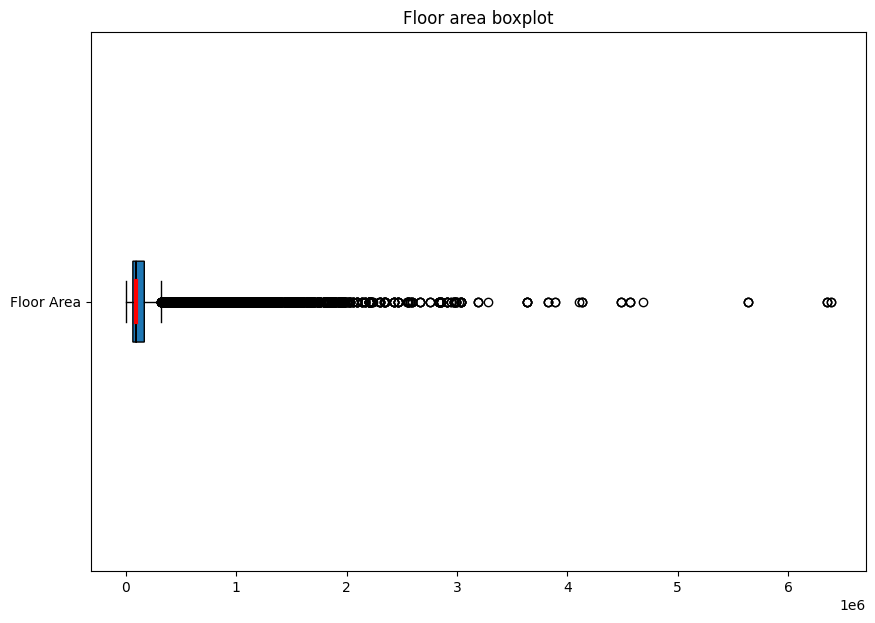

In [100]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data_1, patch_artist = True,
                notch ='True', vert = 0)
 
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 # x-axis labels
ax.set_yticklabels(['Floor Area'])
 
# Adding title
plt.title("Floor area boxplot")
 
# Removing top axes and right axes
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

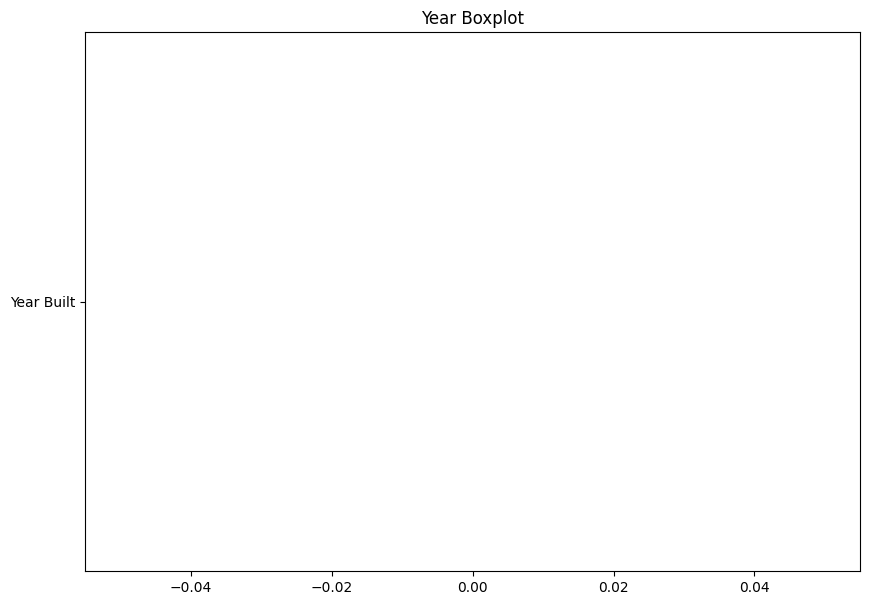

In [101]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data_2, patch_artist = True,
                notch ='True', vert = 0)
 
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 # x-axis labels
ax.set_yticklabels(['Year Built'])
 
# Adding title
plt.title("Year Boxplot")
 
# Removing top axes and right axes
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

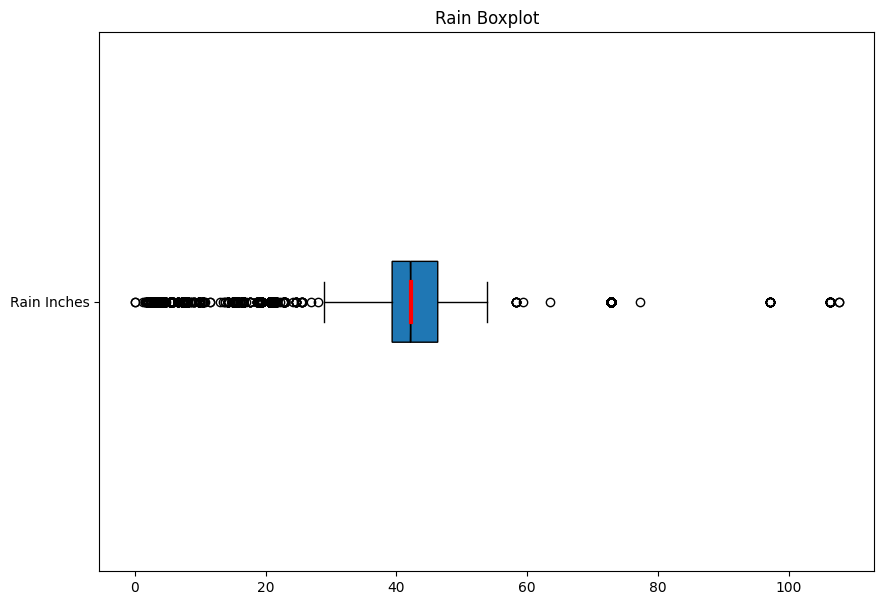

In [102]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data_3, patch_artist = True,
                notch ='True', vert = 0)
 
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 # x-axis labels
ax.set_yticklabels(['Rain Inches'])
 
# Adding title
plt.title("Rain Boxplot")
 
# Removing top axes and right axes
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

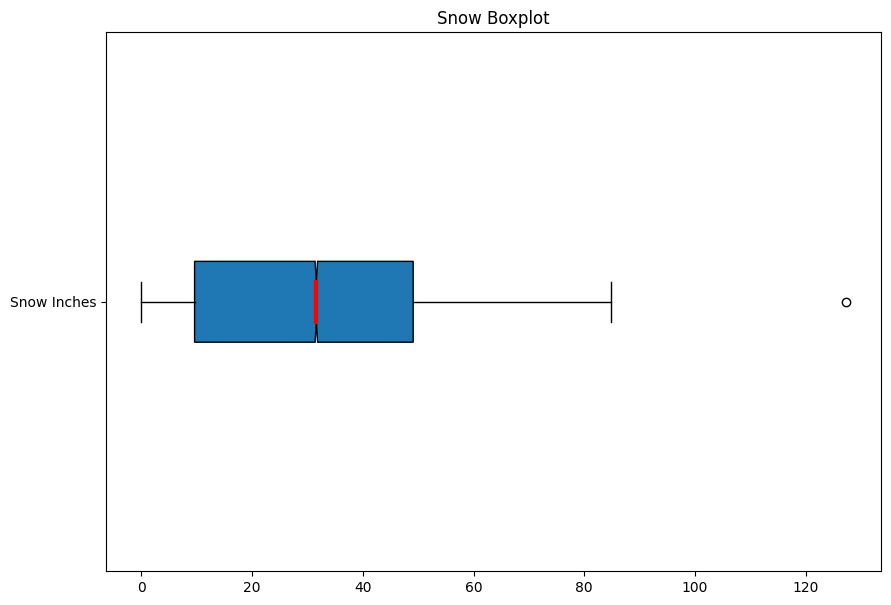

In [103]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data_4, patch_artist = True,
                notch ='True', vert = 0)
 
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 # x-axis labels
ax.set_yticklabels(['Snow Inches'])
 
# Adding title
plt.title("Snow Boxplot")
 
# Removing top axes and right axes
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

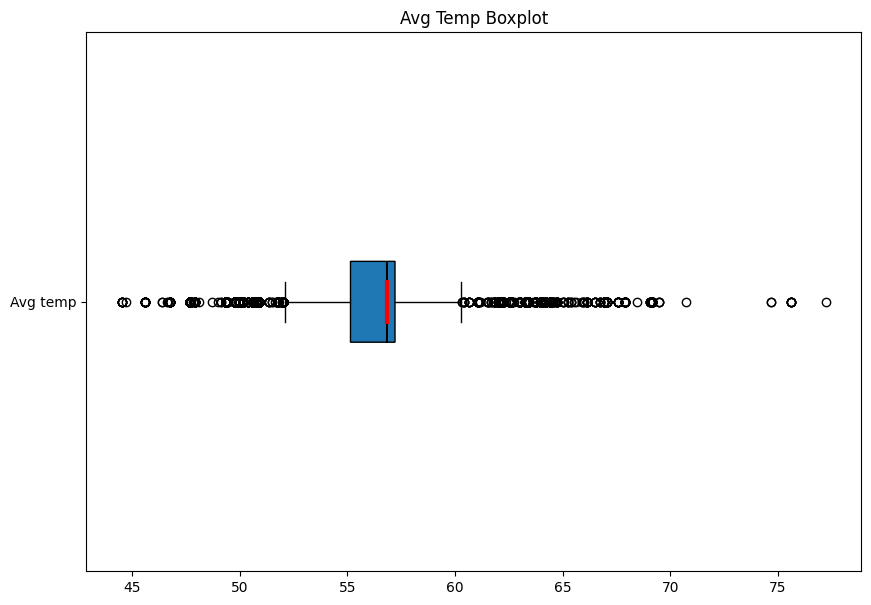

In [104]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data_5, patch_artist = True,
                notch ='True', vert = 0)
 
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 # x-axis labels
ax.set_yticklabels(['Avg temp'])
 
# Adding title
plt.title("Avg Temp Boxplot")
 
# Removing top axes and right axes
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

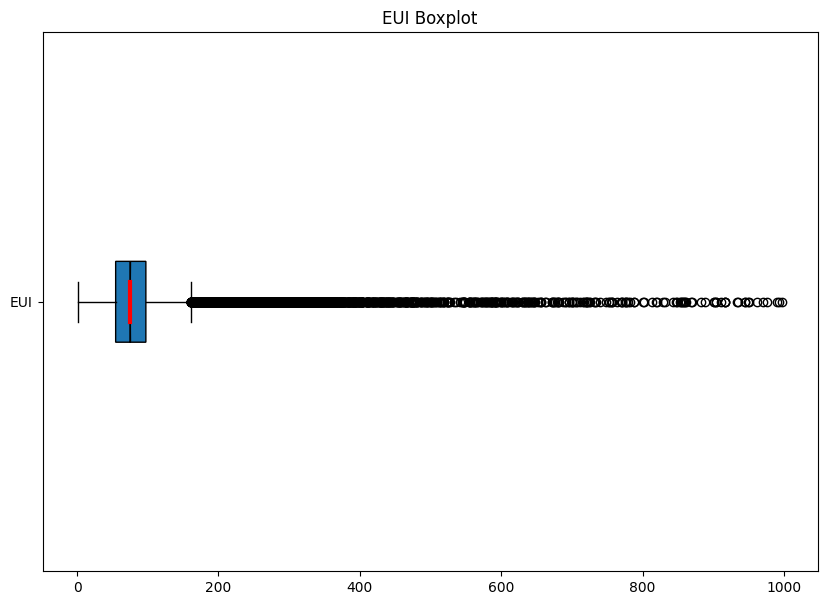

In [105]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data_6, patch_artist = True,
                notch ='True', vert = 0)
 
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 # x-axis labels
ax.set_yticklabels(['EUI'])
 
# Adding title
plt.title("EUI Boxplot")
 
# Removing top axes and right axes
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

## 9. Create a histogram and check the outlier

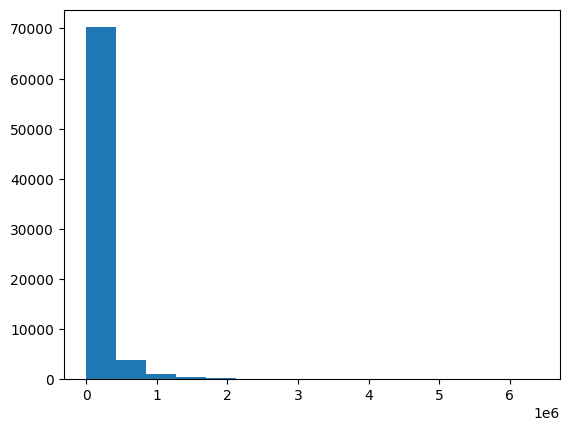

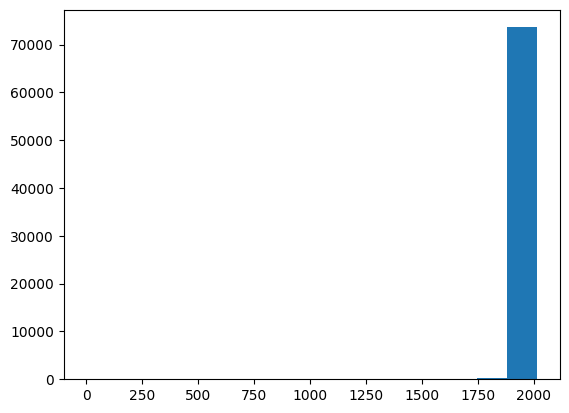

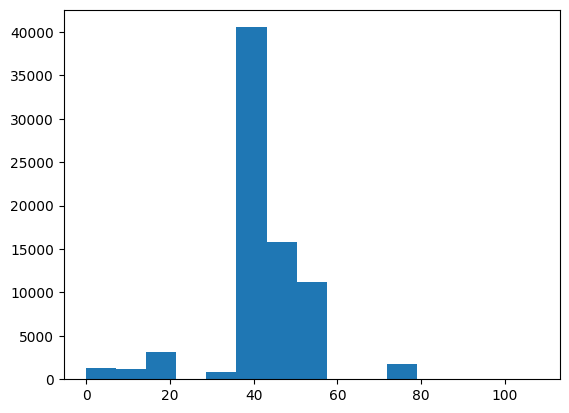

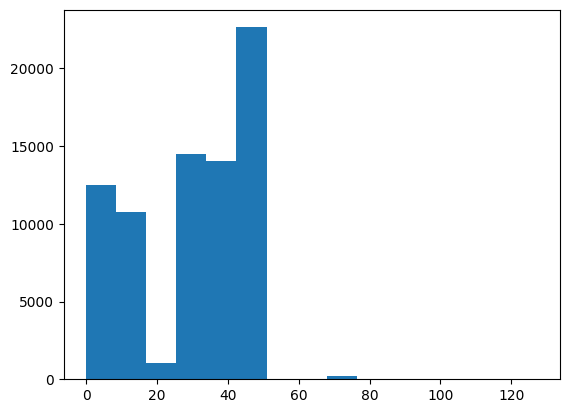

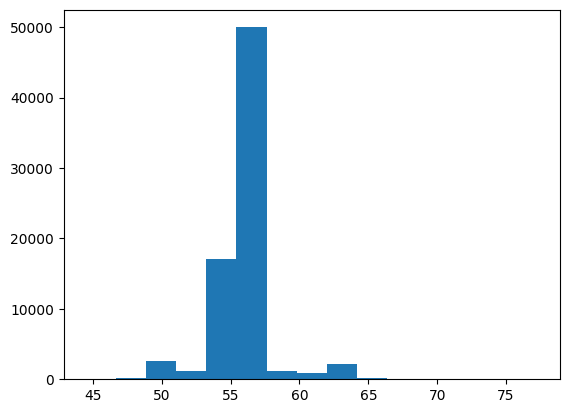

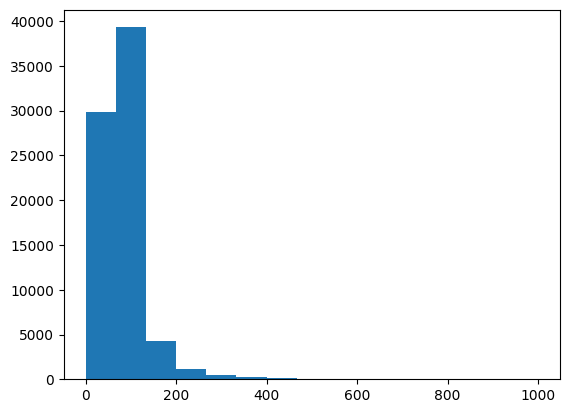

In [106]:
plt.hist(data_1, bins = 15)
plt.show()
plt.hist(data_2, bins = 15)
plt.show()
plt.hist(data_3, bins = 15)
plt.show()
plt.hist(data_4, bins = 15)
plt.show()
plt.hist(data_5, bins = 15)
plt.show()
plt.hist(data_6, bins = 15)
plt.show()

## 10. If feature scaling is needed, please do it.